# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Syifa Gusriani Rohman
- **Email:** syifagusriani08@gmail.com
- **ID Dicoding:** syifag

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh suhu (temperature), kelembaban (humidity), dan kecepatan angin (windspeed) memengaruhi jumlah penyewaan sepeda?
2. Apakah terdapat perbedaan jumlah penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)?
3. Bagaimana perbedaan pola penggunaan antara pengguna casual dan registered?
4. Apakah distribusi penyewaan sepeda merata sepanjang tahun atau ada bulan-bulan tertentu dengan permintaan rendah?
5. Kapan waktu (jam) paling sering dan jarang terjadi transaksi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

## Data Wrangling

### Gathering Data

In [37]:
bs_day_df = pd.read_csv('https://raw.githubusercontent.com/syifagusriani/pad-assets/refs/heads/main/day.csv')
bs_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
bs_hour_df = pd.read_csv('https://raw.githubusercontent.com/syifagusriani/pad-assets/refs/heads/main/hour.csv')
bs_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada line pertama, dengan bantuan library pandas, membaca file csv yang terdapat dalam url tersebut dan diubah menjadi pandas DataFrame.
- Pada line kedua, menampilkan 5 baris pertama dari DataFrame bs_day_df dan bs_hour_df.
- Data berhasil terbaca dan ditampilkan.

### Assessing Data

In [39]:
bs_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [40]:
bs_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [41]:
print("Jumlah duplikasi dataset day: ", bs_day_df.duplicated().sum())
print("Jumlah duplikasi dataset hour: ", bs_hour_df.duplicated().sum())

Jumlah duplikasi dataset day:  0
Jumlah duplikasi dataset hour:  0


**Insight:**
- Saat di cek lebih lanjut dengan code info(), baik itu dataset day maupun hour, anomali yang ditemukan adalah tipe data dteday yang seharusnya datetime, tapi disana tertulis object.
- Untuk pengecekan data duplikasi, tidak terdapat data duplikasi pada dataset.

### Cleaning Data

In [42]:
bs_day_df['dteday'] = pd.to_datetime(bs_day_df['dteday'])
bs_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [43]:
bs_hour_df['dteday'] = pd.to_datetime(bs_hour_df['dteday'])
bs_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Karena permasalahan pada data bs_day_df dan bs_hour_df adalah kesalahan tipe data, maka dilakukan perbaikan dengan mengganti tipe data object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore bs_day_df

In [44]:
print ("Pengelompokan Jumlah Penyewaan Berdasarkan Tahun")
year_dict = {0:2011, 1:2012}
total_year = (bs_day_df.groupby('yr')['cnt'].sum()).rename_axis("Tahun").rename(index=year_dict).rename('Jumlah Penyewaan')
total_year

Pengelompokan Jumlah Penyewaan Berdasarkan Tahun


,Jumlah Penyewaan
Tahun,
2011,1243103
2012,2049576


In [45]:
annual_increase = ((total_year[2012] - total_year[2011])/total_year[2011])*100
print(f"\nPresentase Kenaikan Antar Tahun: {annual_increase:.2f}%")


Presentase Kenaikan Antar Tahun: 64.88%


**Insight:**
- Terlihat bahwa terjadi peningkatan penyewaan dari tahun pertama ke tahun kedua dengan presentase 64.88%

In [46]:
# Mengecek korelasi antar variabel
relation = bs_day_df[['temp', 'hum', 'windspeed', 'cnt']].rename(columns={
    'temp':'Suhu',
    'hum':'Kelembaban',
    'windspeed':'Kecepatan Angin',
    'cnt':'Jumlah Penyewaan'
})
print("Korelasi antar variabel Suhu, Kelembaban, Kecepatan Angin dan Jumlah Penyewaan\n")
relation.corr(numeric_only=True)

Korelasi antar variabel Suhu, Kelembaban, Kecepatan Angin dan Jumlah Penyewaan



,Suhu,Kelembaban,Kecepatan Angin,Jumlah Penyewaan
Suhu,1.000000,0.126963,-0.157944,0.627494
Kelembaban,0.126963,1.000000,-0.248489,-0.100659
Kecepatan Angin,-0.157944,-0.248489,1.000000,-0.234545
Jumlah Penyewaan,0.627494,-0.100659,-0.234545,1.000000


**Insight:**
- Dapat terlihat bahwa dari ketiga variabel (suhu, kelembaban dan kecepatan angin), suhu merupakan variabel yang memiliki korelasi tertinggi dengan total penyewaan.
- Untuk kelembaban dan kecepatan angin memiliki korelasi yang lemah dengan penyewaan.
- Sementara korelasi antara suhu, kelembaban, dan kecepatan angin tidak saling memengaruhi secara signifikan.

In [47]:
print ("Pengelompokan Jumlah Penyewaan Berdasarkan Hari Libur dan Hari Biasa")

day_dict = {0: 'Weekend', 1: 'Weekday'}
total_day = bs_day_df.groupby('workingday')['cnt'].sum().rename_axis("Hari").rename(index=day_dict).rename('Jumlah Penyewaan')
total_day

Pengelompokan Jumlah Penyewaan Berdasarkan Hari Libur dan Hari Biasa


,Jumlah Penyewaan
Hari,
Weekend,1000269
Weekday,2292410


**Insight:**
- Berdasarkan data diatas, terlihat bahwa lebih banyak penyewaan di hari biasa (weekday) ketimbang hari libur.

In [48]:
print ("Pengelompokan Jumlah Penyewaan Berdasarkan Hari Libur Nasional")

# Menjumlahkan total penyewaan berdasarkan variabel holiday
holiday_dict = {0: 'Bukan Libur Nasional', 1: 'Libur Nasional'}
total_holiday = bs_day_df.groupby('holiday')['cnt'].sum().rename_axis("Hari").rename(index=holiday_dict).rename('Jumlah Penyewaan')
total_customers = bs_day_df['cnt'].sum()
total_holiday

Pengelompokan Jumlah Penyewaan Berdasarkan Hari Libur Nasional


,Jumlah Penyewaan
Hari,
Bukan Libur Nasional,3214244
Libur Nasional,78435


In [49]:
# Membuat presentase penyewaan
holiday_proportion = (total_holiday['Libur Nasional'] / total_customers) * 100
print(f"Proporsi Penyewaan pada Hari Libur Nasional: {holiday_proportion:.2f}%")

Proporsi Penyewaan pada Hari Libur Nasional: 2.38%


**Insight:**
- Terlihat bahwa pada hari libur nasional (mengacu pada data http://dchr.dc.gov/page/holiday-schedule), tidak banyak yang menyewa sepeda dengan dibuktikan presentase yang hanya 2.38% dari keseluruhan total penyewaan.

### Eksplore bs_hour_df

In [50]:
sum_hour = bs_hour_df.groupby('hr')['cnt'].sum().rename_axis("Hour").rename('Jumlah Penyewaan')
sum_hour = sum_hour.sort_values(ascending=False)

print("Jumlah Penyewaan pada Seluruh Waktu (Jam)")
sum_hour

Jumlah Penyewaan pada Seluruh Waktu (Jam)


,Jumlah Penyewaan
Hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


**Insight:**
- Data diatas menunjukkan urutan waktu mulai dari jam paling banyak penyewaan hingga jam paling sedikit penyewaan.

In [51]:
filter_spring = bs_hour_df[bs_hour_df['season'] == 1]
filter_summer = bs_hour_df[bs_hour_df['season'] == 2]
filter_fall = bs_hour_df[bs_hour_df['season'] == 3]
filter_winter = bs_hour_df[bs_hour_df['season'] == 4]

spring_max_hour = filter_spring.groupby('hr')['cnt'].sum().idxmax()
summer_max_hour = filter_summer.groupby('hr')['cnt'].sum().idxmax()
fall_max_hour = filter_fall.groupby('hr')['cnt'].sum().idxmax()
winter_max_hour = filter_winter.groupby('hr')['cnt'].sum().idxmax()

busiest_hour = pd.DataFrame({
    'Spring':[spring_max_hour],
    'Summer':[summer_max_hour],
    'Fall':[fall_max_hour],
    'Winter':[winter_max_hour]})

print("Daftar Waktu (Jam) Paling Banyak Penyewaan Sepeda Berdasarkan Musim 2011-2012")
busiest_hour.T

Daftar Waktu (Jam) Paling Banyak Penyewaan Sepeda Berdasarkan Musim 2011-2012


,0
Spring,17
Summer,17
Fall,17
Winter,17


**Insight:**
- Hal ini diperkuat dengan melihat jam tersibuk (paling banyak penyewaan) yang dilihat berdasarkan musim, yakni di pukul 17.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana suhu (temperature), kelembaban (humidity), dan kecepatan angin (windspeed) memengaruhi jumlah penyewaan sepeda?

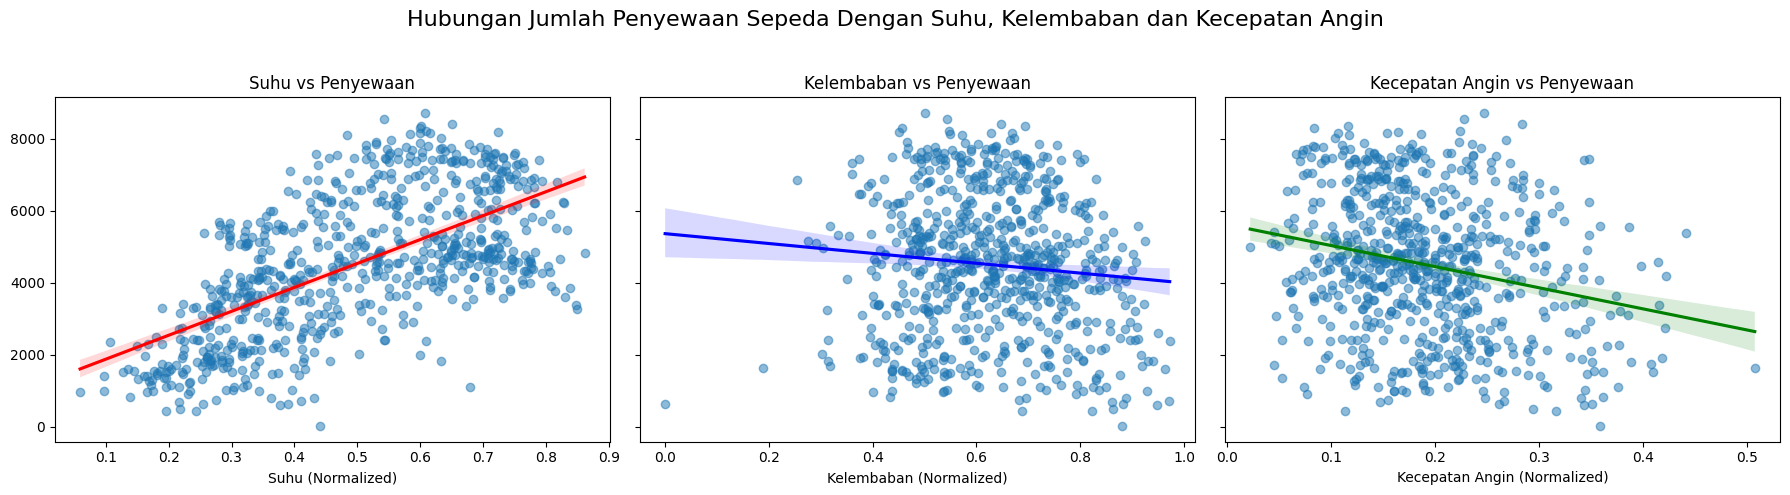

In [52]:
# Membuat Subplots
fig, ax1 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Hubungan Jumlah Penyewaan Sepeda Dengan Suhu, Kelembaban dan Kecepatan Angin', fontsize=16)

# Temperature
sns.regplot(data=bs_day_df, x='temp', y='cnt', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax1[0])
ax1[0].set_title('Suhu vs Penyewaan')
ax1[0].set_xlabel('Suhu (Normalized)')
ax1[0].set_ylabel(None)

# Humidity
sns.regplot(data=bs_day_df, x='hum', y='cnt', scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'}, ax=ax1[1])
ax1[1].set_title('Kelembaban vs Penyewaan')
ax1[1].set_xlabel('Kelembaban (Normalized)')
ax1[1].set_ylabel(None)

# Windspeed
sns.regplot(data=bs_day_df, x='windspeed', y='cnt', scatter_kws={'alpha': 0.5}, line_kws={'color': 'green'}, ax=ax1[2])
ax1[2].set_title('Kecepatan Angin vs Penyewaan')
ax1[2].set_xlabel('Kecepatan Angin (Normalized)')
ax1[2].set_ylabel(None)


fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Insight:**
- Scatter plot temperature cenderung membentuk pola yang naik ke kanan.
Ini menunjukkan bahwa jumlah penyewaan sepeda meningkat seiring dengan suhu yang lebih hangat.
- Scatter plot humidity terlihat lebih acak. Hal ini menunjukkan bahwa kelembaban tidak terlalu berpengaruh pada jumlah penyewaan sepeda.
Namun, ada sedikit kecenderungan penyewaan terjadi pada kelembaban yang lebih tinggi.
- Scatter plot windspeed juga terlihat lebih acak, menandakan bahwa kecepatan angin tidak banyak memengaruhi jumlah penyewaan sepeda.
Namun, ada sedikit kecenderungan jumlah penyewaan lebih banyak terjadi saat kecepatan angin rendah.

### Pertanyaan 2: Apakah terdapat perbedaan jumlah penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)?

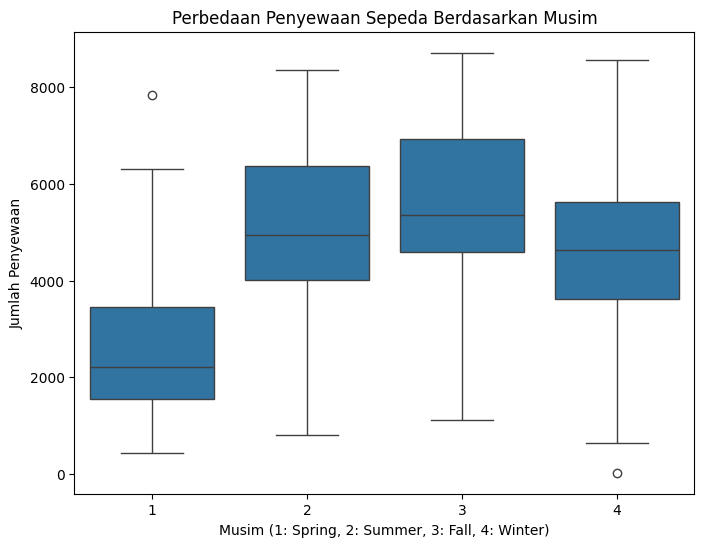

In [53]:
# Boxplot jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
sns.boxplot(data=bs_day_df, x='season', y='cnt')
plt.title('Perbedaan Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

In [54]:
# Melihat nilai kemiringan per season
# Spring
spring = bs_day_df[bs_day_df['season'] == 1]['cnt']
skew_spring = skew(spring)

# Summer
summer = bs_day_df[bs_day_df['season'] == 2]['cnt']
skew_summer = skew(summer)

# Fall
fall = bs_day_df[bs_day_df['season'] == 3]['cnt']
skew_fall = skew(fall)

# Winter
winter = bs_day_df[bs_day_df['season'] == 4]['cnt']
skew_winter = skew(winter)

all_skewness = pd.DataFrame({
    'Spring Skewness': [skew_spring],
    'Summer Skewness': [skew_summer],
    'Fall Skewness': [skew_fall],
    'Winter Skewness': [skew_winter]})

print("Nilai Kemiringan Data Setiap Musim\n")
all_skewness

Nilai Kemiringan Data Setiap Musim



,Spring Skewness,Summer Skewness,Fall Skewness,Winter Skewness
0,0.87797,-0.261461,-0.095464,0.091741


In [55]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
avg_season_temp = bs_day_df.groupby('season')['temp'].mean().rename(index=season_dict).rename('Suhu').rename_axis('Season')
avg_season_temp = avg_season_temp * 41
avg_season_temp

,Suhu
Season,
Spring,12.207650
Summer,22.320611
Fall,28.958682
Winter,17.339148


**Insight:**
- Terlihat bahwa pada plot spring, data menunjukkan positive skewness. Artinya penyewaan cenderung rendah, namun juga ada beberapa hari yang penyewaan bisa sangat tinggi. Hal ini diperkuat dengan rata - rata suhu pada musim ini yang lebih rendah dibanding musim lainnya (referensi: hubungan antara temperature dan jumlah penyewaan pada pertanyaan sebelumnya).

- Memasuki summer, jumlah penyewaan sepeda meningkat dibanding musim sebelumnya. Pada musim ini, musim ini menunjukkan negative skewers, dimana pedistribusian data yang cenderung diatas, artinya lebih banyak pengunjung dari hari ke harinya dibandingkan spring sebelumnya.

- Dilanjutkan dengan fall, jumlah penyewaan meningkat dibandingkan summer. Sama seperti summer, di musim ini juga menunjukkan negative skewers, namun tidak sebesar summer. Pada musim ini pula terjadi jumlah penyewaan terbanyak dibandingkan musim - musim lainnya.

- Pada winter menunjukkan tren yang berbeda. Penyewaan sepeda di musim ini terlihat lebih merata (dilihat dari plot yang hampir seimbang). Namun tetap agak condong ke arah bawah yakni positive skewness walaupun tidak sebesar pada spring.

### Pertanyaan 3: Bagaimana perbedaan pola penggunaan antara pengguna casual dan registered?

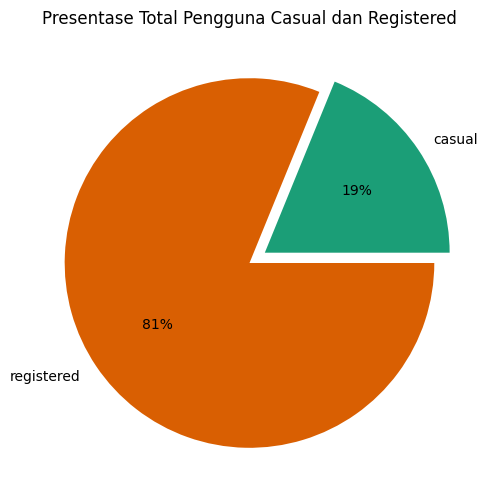

In [56]:
# Presentase pengguna casual dan registered
avg_users = bs_day_df[['casual', 'registered']].sum()

# Visualisasi
exploded = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.title('Presentase Total Pengguna Casual dan Registered')
plt.pie(avg_users, labels=avg_users.index, colors=plt.cm.Dark2.colors, autopct='%.0f%%', textprops={'color':'black'}, explode=exploded)

plt.show()

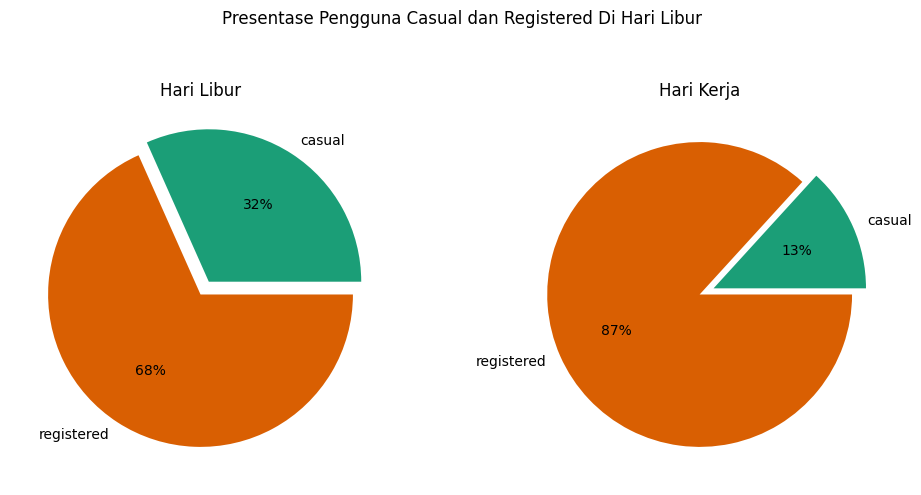

In [57]:
# Fliter Data
weekend_holiday = bs_day_df[(bs_day_df['holiday'] == 1) | (bs_day_df['workingday'] == 0)]
working_day = bs_day_df[bs_day_df['workingday'] == 1]

avg_users_wh = weekend_holiday[['casual', 'registered']].mean()
avg_users_wd = working_day[['casual', 'registered']].mean()

# Visualisasi

exploded = (0.1, 0)
fig, ax2 = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Presentase Pengguna Casual dan Registered Di Hari Libur')

# Hari Libur
ax2[0].pie(avg_users_wh , labels=avg_users_wh .index, colors=plt.cm.Dark2.colors, autopct='%.0f%%', textprops={'color':'black'}, explode=exploded)
ax2[0].set_title('Hari Libur')

# Hari Kerja
ax2[1].pie(avg_users_wd , labels=avg_users_wd .index, colors=plt.cm.Dark2.colors, autopct='%.0f%%', textprops={'color':'black'}, explode=exploded)
ax2[1].set_title('Hari Kerja')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

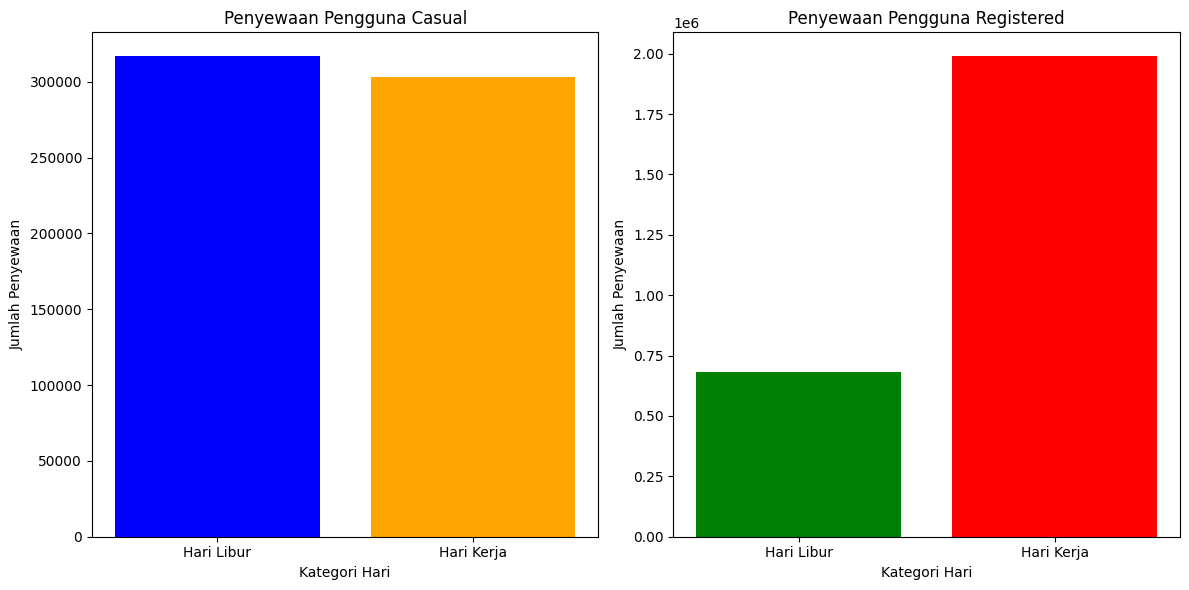

In [58]:
# Menghitung total penyewaan casual untuk hari libur dan hari kerja
total_casual_howe = weekend_holiday['casual'].sum()
total_casual_workingday = bs_day_df[bs_day_df['workingday'] == 1]['casual'].sum()

# Menghitung total penyewaan registered untuk hari libur dan hari kerja
total_registered_howe = weekend_holiday['registered'].sum()
total_registered_workingday = bs_day_df[bs_day_df['workingday'] == 1]['registered'].sum()

fig, ax2 = plt.subplots(1, 2, figsize=(12, 6))

# Plot penyewaan casual
ax2[0].bar(['Hari Libur', 'Hari Kerja'],
            [total_casual_howe, total_casual_workingday],
            color=['blue', 'orange'])
ax2[0].set_title('Penyewaan Pengguna Casual')
ax2[0].set_ylabel('Jumlah Penyewaan')
ax2[0].set_xlabel('Kategori Hari')

# Plot penyewaan registered
ax2[1].bar(['Hari Libur', 'Hari Kerja'],
            [total_registered_howe, total_registered_workingday],
            color=['green', 'red'])
ax2[1].set_title('Penyewaan Pengguna Registered')
ax2[1].set_ylabel('Jumlah Penyewaan')
ax2[1].set_xlabel('Kategori Hari')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Dapat dilihat bahwa antara pengguna casual dan registered memiliki perbedaan yang cukup jauh. Hal ini menandakan sebagian besar pengguna adalah dari pengguna registered.
- Pada hari libur, memang total pengguna casual sedikit lebih banyak dibandingkan pada hari kerja, namun tetap pengguna registered yang mendominasi.
- Pengguna casual lebih banyak melakukan penyewaan sepeda disaat hari libur (baik itu libur nasional maupun akhir pekan), sedangkan pengguna registered jauh lebih banyak melakukan penyewaan sepeda saat hari kerja.

### Pertanyaan 3: Apakah distribusi penyewaan sepeda merata sepanjang tahun atau ada bulan-bulan tertentu dengan permintaan rendah?

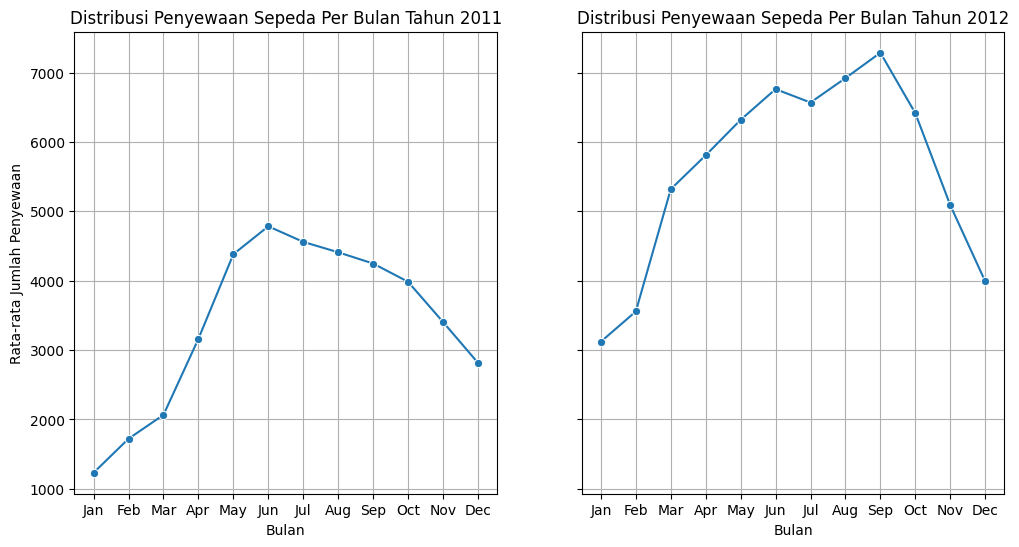

In [59]:
# Rata-rata penyewaan per bulan
first_year = bs_day_df[bs_day_df['yr'] == 0]
second_year = bs_day_df[bs_day_df['yr'] == 1]

avg_mnth_first = first_year.groupby('mnth')['cnt'].mean()
avg_mnth_second = second_year.groupby('mnth')['cnt'].mean()

# Visualisasi line plot
fig, ax3 = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# 2011
sns.lineplot(x=avg_mnth_first.index, y=avg_mnth_first.values, marker='o', ax=ax3[0])
ax3[0].set_title('Distribusi Penyewaan Sepeda Per Bulan Tahun 2011')
ax3[0].set_xlabel('Bulan')
ax3[0].set_ylabel('Rata-rata Jumlah Penyewaan')
ax3[0].set_xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3[0].grid(True)

# 2012
sns.lineplot(x=avg_mnth_second.index, y=avg_mnth_second.values, marker='o', ax=ax3[1])
ax3[1].set_title('Distribusi Penyewaan Sepeda Per Bulan Tahun 2012')
ax3[1].set_xlabel('Bulan')
ax3[1].set_xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3[1].grid(True)

plt.show()

**Insight:**
- Dapat dilihat bahwa terjadi kenaikan yang cukup signifikan dari tahun pertama ke tahun kedua
- Pada Tahun pertama, terjadi kenaikan yang  cukup stabil pada bulan Januari - Juni, lalu penurunan yang cukup stabil pada bulan Juli - Desember.
- Pada Tahun kedua, hampir mirip seperti tahun pertama namun di bulan Agustus - September terjadi kenaikan dan kembali menurun dari bula Oktober - Desember.

### Pertanyaan 5: Kapan waktu (jam) paling sering dan jarang terjadi transaksi penyewaan sepeda?

<ipython-input-60-a8f534d2ab90>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hour.index, y=top_hour.values, ax=ax4[0], palette=colors1)
<ipython-input-60-a8f534d2ab90>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_hour.index, y=bottom_hour.values, ax=ax4[1], palette=colors2)


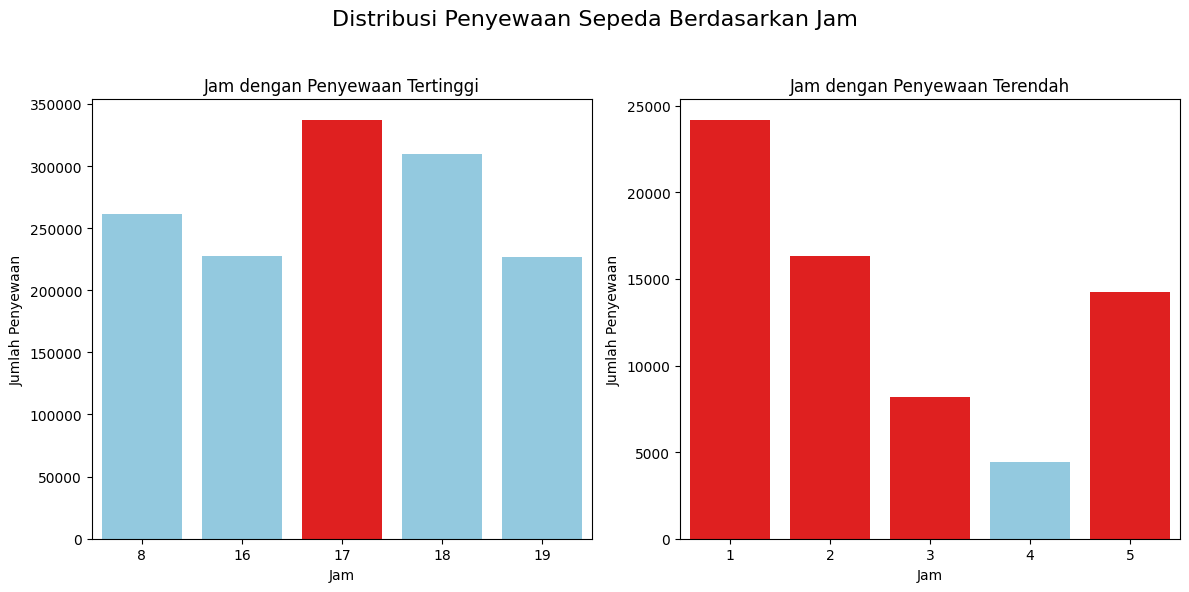

In [60]:
# Mengambil 5 data jam dengan jumlah penyewaan tertinggi dan terendah
top_hour = sum_hour.head(5)
bottom_hour = sum_hour.tail(5)

# Mengatur data sesuai index hour
top = top_hour.sort_index(ascending=True)
bottom = bottom_hour.sort_index(ascending=True)

# Mendapatkan nilai maks dan min
top_index = top_hour.idxmax()
bottom_index = bottom_hour.idxmin()

# Menentukan warna
colors1 = ['red' if i == top_index else 'skyblue' for i in top.index]
colors2 = ['skyblue' if i == bottom_index else 'red' for i in bottom.index]

# Membuat subplot
fig, ax4 = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribusi Penyewaan Sepeda Berdasarkan Jam', fontsize=16)

# Plot untuk top_hour
sns.barplot(x=top_hour.index, y=top_hour.values, ax=ax4[0], palette=colors1)
ax4[0].set_title('Jam dengan Penyewaan Tertinggi')
ax4[0].set_xlabel('Jam')
ax4[0].set_ylabel('Jumlah Penyewaan')

# Plot untuk bottom_hour
sns.barplot(x=bottom_hour.index, y=bottom_hour.values, ax=ax4[1], palette=colors2)
ax4[1].set_title('Jam dengan Penyewaan Terendah')
ax4[1].set_xlabel('Jam')
ax4[1].set_ylabel('Jumlah Penyewaan')

# Menyesuaikan tata letak
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Insight:**
- Pada visualisasi diatas, pada penyewaan tertinggi itu ada di pukul 17:00, disusul oleh pukul 8.
- Sementara penyewaan terendah itu ada di pukul 4:00, disusul oleh pukul 3:00.

## Analisis Lanjutan (Opsional)

### Clustering

**Tujuan:**
- Dilakukannya analisa lanjutan ini ialah mendapatkan insight baru yang nantinya akan memperkuat keterangan dari hasil yang sudah digali pada saat menjawab pertanyaan bisnis.
- Analisa ini dilakukan lebih mendalam dibanding tahap sebelumnya, dengan menggunakan metode clustering.

In [61]:
# Manual Grouping berdasarkan waktu

def classify_hour(hour):
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'

bs_hour_df['classify_hour'] = bs_hour_df['hr'].apply(classify_hour)


In [62]:
# Manual Grouping berdasarkan Humidity

def classify_hum(hum):
    if hum < 0.45:
        return 'Too Dry'
    elif 0.45 <= hum <= 0.65:
        return 'Ideal'
    else :
        return 'Too Moist'

bs_day_df['classify_hum'] = bs_day_df['hum'].apply(classify_hum)
bs_hour_df['classify_hum'] = bs_hour_df['hum'].apply(classify_hum)


In [63]:
# Manual Grouping berdasarkan Kecepatan Angin

def classify_wind(wind):
    if wind < 0.015:
        return 'Calm'
    elif 0.015 < wind <= 0.075:
        return 'Light air'
    elif 0.075 < wind <= 0.1642:
        return 'Light Breeze'
    elif 0.1642 < wind <= 0.284:
        return 'Gentle Breeze'
    elif 0.284 < wind <= 0.418:
        return 'Moderate Breeze'
    elif 0.418 < wind <= 0.567:
        return 'Fresh Breeze'

bs_day_df['classify_wind'] = bs_day_df['windspeed'].apply(classify_wind)
bs_hour_df['classify_wind'] = bs_hour_df['windspeed'].apply(classify_wind)

**Insight:**
- Melakukan beberapa manual grouping berdasarkan pengelompokan waktu (jam), kelembaban, dan kecepatan angin

In [64]:
print("Pengelompokan Jumlah Penyewaan Berdasarkan Periode Kelembaban")

class_hum_cnt = bs_day_df.groupby("classify_hum")["cnt"].sum().rename_axis("Classify Humidity").rename("Jumlah Penyewaan")
class_hum_cnt

Pengelompokan Jumlah Penyewaan Berdasarkan Periode Kelembaban


,Jumlah Penyewaan
Classify Humidity,
Ideal,1618295
Too Dry,281937
Too Moist,1392447


**Insight:**
- Dari data diatas, jumlah penyewaan terbanyak terjadi saat kelebaban ideal.

In [65]:
print("Pengelompokan Jumlah Penyewaan Berdasarkan Periode Kecepatan Angin")

class_wind_cnt = bs_day_df.groupby("classify_wind")["cnt"].sum().rename_axis("Classify Wind Speed").rename("Jumlah Penyewaan")
class_wind_cnt

Pengelompokan Jumlah Penyewaan Berdasarkan Periode Kecepatan Angin


,Jumlah Penyewaan
Classify Wind Speed,
Fresh Breeze,13944
Gentle Breeze,1506985
Light Breeze,1313096
Light air,148957
Moderate Breeze,309697


**Insight:**
- Dari data diatas, jumlah penyewaan terbanyak terjadi saat kecepatan angin yang pelan.

In [66]:
weathersit_dict = {1: 'Clear/Cloudy', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
total_weathersit_temp = bs_hour_df.groupby(by='weathersit').agg({
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'cnt': 'sum'
}).rename(index=weathersit_dict).rename_axis('Weather Situation')

total_weathersit_temp['temp'] *= 41
total_weathersit_temp['hum'] *= 100
total_weathersit_temp['windspeed'] *= 67

total_weathersit_temp = total_weathersit_temp.rename(columns={
    'temp': 'Suhu',
    'hum': 'Kelembaban',
    'windspeed': 'Kecepatan Angin',
    'cnt': 'Jumlah Penyewaan'
})
total_weathersit_temp

,Suhu,Kelembaban,Kecepatan Angin,Jumlah Penyewaan
Weather Situation,,,,
Clear/Cloudy,20.953217,57.374660,12.767059,2338173
Mist/Cloudy,19.452262,69.880722,12.058220,795952
Light Snow/Rain,18.724200,82.763214,14.661253,158331
Heavy Rain/Snow,7.653333,88.333333,13.668000,223


**Insight:**
- Sebelumnya dilihat bahwa cuaca yang paling banyak terjadi penyewaan adalah disaat cuaca cerah berawan (Clear/Cloudy). Dilihat dari tabel perbandingan cuaca dengan suhu, di cuaca tersebut rata - rata suhu sekitar 20.953°C, Kelembaban di angka 57.375 % dan Kecepatan angin di angka 12.767 km/h.
- Terlihat juga bahwa berdasarkan beberapa kondisi cuaca, orang - orang lebih banyak melakukan penyewaan pada saat cuaca cerah berawan (Clear/Cloudy).
- Sementara cuaca yang paling dihindari ialah hujan besar atau bersalju, dilihat dari jumlah penyewaan yang paling sedikit.

In [67]:
print("Pengelompokan Jumlah Penyewaan Berdasarkan Periode Waktu")

sum_time = bs_hour_df.groupby('classify_hour')['cnt'].sum().rename_axis("Classify Hour").rename('Total Penyewaan')
sum_time

Pengelompokan Jumlah Penyewaan Berdasarkan Periode Waktu


,Total Penyewaan
Classify Hour,
Afternoon,1292742
Evening,986109
Morning,907319
Night,106509


**Insight:**
- Dilakukan pengelompokan jumlah penyewaan berdasarkan periode waktu dan terlihat bahwa orang lebih banyak melakukan penyewaan di waktu siang (afternoon) antara pukul 12:00 - 17:00.
- Sedangkan yang paling sedikit ialah pada dini hari (Night) antara pukul 0:00 - 5:00.


In [68]:
day_of_week_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
total_day_of_week = bs_day_df.groupby('weekday')['cnt'].sum().rename(index=day_of_week_dict).rename('Jumlah Penyewaan').rename_axis('Day of Week')
total_day_of_week

,Jumlah Penyewaan
Day of Week,
Sunday,444027
Monday,455503
Tuesday,469109
Wednesday,473048
Thursday,485395
Friday,487790
Saturday,477807


**Insight:**
- Untuk pengelompokan berdasarkan hari dalam seminggu, hasilnya berkisar diatas angka 400000 penyewaan pada semua hari dan hari jumat menjadi hari dengan penyewaan terbanyak, dan memiliki selisih 2395 penyewaan dengan hari kamis (kedua terbanyak) dan selisih 43763 penyewaan dengan hari minggu (penyewaan paling sedikit)

## Conclusion

- Conclusion pertanyaan 1: Diantara ketiga faktor cuaca (suhu, kelembaban, dan kecepatan angin) suhu tampaknya menjadi faktor yang paling memengaruhi jumlah penyewaan sepeda. Sementara kelembaban dan kecepatan angin memiliki pengaruh yang relatif kecil (sedikit kecenderungan penyewaan lebih banyak terjadi pada saat kecepatan angin rendah dan sedikit kecenderungan penyewaan lebih banyak terjadi pada saat kelembaban tinggi) atau tidak signifikan.

- Conclusion pertanyaan 2: Diantara keempat musim, fall menjadi musim dengan jumlah penyewaan terbanyak, diikuti summer, winter dan yang terakhir spring dengan jumlah penyewaan paling sedikit. Hasil perbandingan antara suhu dan musim menunjukkan bahwa fall, summer, winter dan spring merupakan urutan suhu tertinggi ke terendah, semakin memperkuat statemnet bahwa fall adalah musim dengan penyewaan terbanyak.

- Conclusion pertanyaan 3: Perbedaan pola antara pengguna casual dan pengguna registered adalah untuk pengguna casual lebih banyak melakukan penyewaan sepeda saat hari libur, sedangkan pengguna registered lebih banyak melakukan penyewaan sepeda saat hari kerja. Dari kedua jenis pengguna ini, lebih banyak pengguna registered.

- Conclusion pertanyaan 4: Secara keseluruhan, terjadi kenaikan signifikan dalam jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012. Dengan pola kenaikan yang mirip di kedua tahun, yakni naik sampai pertengahan tahun dan kemudian stabil menurun, walaupun terdapat sedikit perbedaan di tahun kedua (2012) yang sempat naik sedikit di bulan agustus-september dan kembali turun sampai penghujung tahun.

- Conclusion pertanyaan 5: Untuk jam dengan jumlah penyewaan terbesar ada di pukul 17:00 dan diikuti jam 18 yang keduanya termasuk sore hari. Sedangkan jam dengan jumlah penyewaan terkecil ada di pukul 4:00 diikuti pukul 3:00 yang mana keduanya termasuk dini hari.

Pola penggunaan layanan bike-sharing tahun 2011 - 2012 menunjukkan bahwa sepeda lebih sering disewa untuk keperluan sehari-hari, seperti perjalanan pulang kerja atau sekolah, dibandingkan dengan rekreasi. Hal ini terlihat dari hari - hari kerja (weekday) yang mendominasi penyewaan (dan hari Jumat sebagai hari dengan jumlah pengguna terbanyak) serta waktu sore hari yang mencatat jumlah penyewaan tertinggi (dua jam teratas adalah 17:00 dan 18:00). Pengguna cenderung menyukai kondisi cuaca yang cerah berawan, dengan suhu sekitar 20,95°C, kelembaban ideal sekitar 57,38%, dan kecepatan angin yang rendah di kisaran 12,77 km/jam.